In [1]:
# Nativos
import random as rn
import os
import sys
import gc

#calculo
import numpy as np
import pandas as pd
import scipy

#grafico
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
%matplotlib inline
sns.set(style="whitegrid")

#warning ignore future
import warnings
# warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings("ignore")
gc.collect()

"""
BASE_DIR = os.path.dirname(os.getcwd())
if BASE_DIR not in sys.path: sys.path.append(BASE_DIR)

from utils import *
from graphs import *
"""

SEED = 29082013
os.environ['PYTHONHASHSEED'] = str(SEED)
np.random.seed(SEED)
rn.seed(SEED)

subfolder = "data"
os.listdir(subfolder)

['prd08mcs.csv',
 'Alertas Zabbix - Septiembre.xlsx',
 'prd08mcs.xlsx',
 'Incidencias Resumen.xlsx',
 'Categorias configuradas en ZABBIX.xlsx',
 'prd23crm.xlsx',
 'prd01mcs.xlsx',
 'Métricas CPU Histórico - webmvmwlnxv11.txt',
 'Eventos ZABBIX - Ultima Semana NOV.xlsx']

In [101]:
use_cols = [
    'hostid', 'host', 'itemid', 'hostid.1', 'history', 'trends',
    'value', 'status', 'clock', 'from_unixt', 'ime(c.clock)'
]
read_parameters = {
    'header': 1,
    'sep': ',',
    'usecols': use_cols
}

In [102]:
def read_csv_server(csv_name):
    col_date = 'date_hour'
    
    data = pd.read_csv(
        "{}/{}".format(subfolder, csv_name), **read_parameters
    ).iloc[1:-1]
    
    data[col_date] = data['from_unixt'].astype(str) + ' ' + data['ime(c.clock)'].astype(str)
    data[col_date] = pd.to_datetime(
        data[col_date], 
        errors='coerce', 
        format='%d/%m/%Y %H:%M:%S'
    )
    data = data.sort_values(by=[col_date])
    data.set_index(col_date, inplace=True)
    data['value'] = data['value'].astype(float)
    
    return data[use_cols[:-2]]

In [103]:
prd08mcs = read_csv_server('prd08mcs.csv')
prd01mcs = read_csv_server('prd01mcs.csv')
prd23crm = read_csv_server('prd23crm.csv')

In [104]:
display(prd08mcs.head(3))
display(prd08mcs.tail(3))
print("/"*100)
display(prd01mcs.head(3))
display(prd01mcs.tail(3))
print("/"*100)
display(prd23crm.head(3))
display(prd23crm.tail(3))

,hostid,host,itemid,hostid.1,history,trends,value,status,clock
date_hour,,,,,,,,,
2019-11-25 15:15:42,10707,prd08mcs,85242,10707,1w,365d,78.3160,0,1574712942
2019-11-25 15:15:43,10707,prd08mcs,85243,10707,1w,365d,96.4333,0,1574712943
2019-11-25 15:15:45,10707,prd08mcs,85244,10707,1w,365d,84.9153,0,1574712945


,hostid,host,itemid,hostid.1,history,trends,value,status,clock
date_hour,,,,,,,,,
2019-11-25 15:48:50,10707,prd08mcs,85249,10707,1w,365d,53.7723,0,1574714930
2019-11-25 15:48:50,10707,prd08mcs,85250,10707,1w,365d,56.8691,0,1574714930
2019-11-25 15:48:51,10707,prd08mcs,85251,10707,1w,365d,97.6133,0,1574714931


////////////////////////////////////////////////////////////////////////////////////////////////////


,hostid,host,itemid,hostid.1,history,trends,value,status,clock
date_hour,,,,,,,,,
2019-09-03 14:07:10,10700,prd01mcs,103516,10700,90d,365d,1.0,0,1567537630
2019-09-03 14:07:10,10700,prd01mcs,103517,10700,90d,365d,1.0,0,1567537630
2019-09-03 14:07:10,10700,prd01mcs,103518,10700,90d,365d,1.0,0,1567537630


,hostid,host,itemid,hostid.1,history,trends,value,status,clock
date_hour,,,,,,,,,
2019-09-03 15:29:45,10700,prd01mcs,103529,10700,90d,365d,1.0,0,1567542585
2019-09-03 15:29:45,10700,prd01mcs,103527,10700,90d,365d,1.0,0,1567542585
2019-09-03 15:30:25,10700,prd01mcs,103516,10700,90d,365d,1.0,0,1567542625


////////////////////////////////////////////////////////////////////////////////////////////////////


,hostid,host,itemid,hostid.1,history,trends,value,status,clock
date_hour,,,,,,,,,
2019-11-25 17:31:14,10692,prd23crm,84554,10692,1w,365d,91.4963,0,1574721074
2019-11-25 17:31:15,10692,prd23crm,84555,10692,1w,365d,99.9725,0,1574721075
2019-11-25 17:31:17,10692,prd23crm,84556,10692,1w,365d,99.9391,0,1574721077


,hostid,host,itemid,hostid.1,history,trends,value,status,clock
date_hour,,,,,,,,,
2019-11-25 18:06:41,10692,prd23crm,84581,10692,1w,365d,88.5127,0,1574723201
2019-11-25 18:06:42,10692,prd23crm,84582,10692,1w,365d,90.4631,0,1574723202
2019-11-25 18:06:42,10692,prd23crm,82542,10692,1w,365d,84.7686,0,1574723202


In [105]:
prd08mcs.shape, prd01mcs.shape, prd23crm.shape

((1000, 9), (1000, 9), (1000, 9))

In [106]:
display(prd08mcs.describe().T)
display(prd01mcs.describe().T)
display(prd23crm.describe().T)

,count,mean,std,min,25%,50%,75%,max
value,1000.0,84.691727,23.092105,0.0545,78.316,96.7425,99.624,99.9995


,count,mean,std,min,25%,50%,75%,max
value,1000.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0


,count,mean,std,min,25%,50%,75%,max
value,1000.0,83.559987,24.859973,0.0075,79.1382,95.38905,99.6681,99.9944


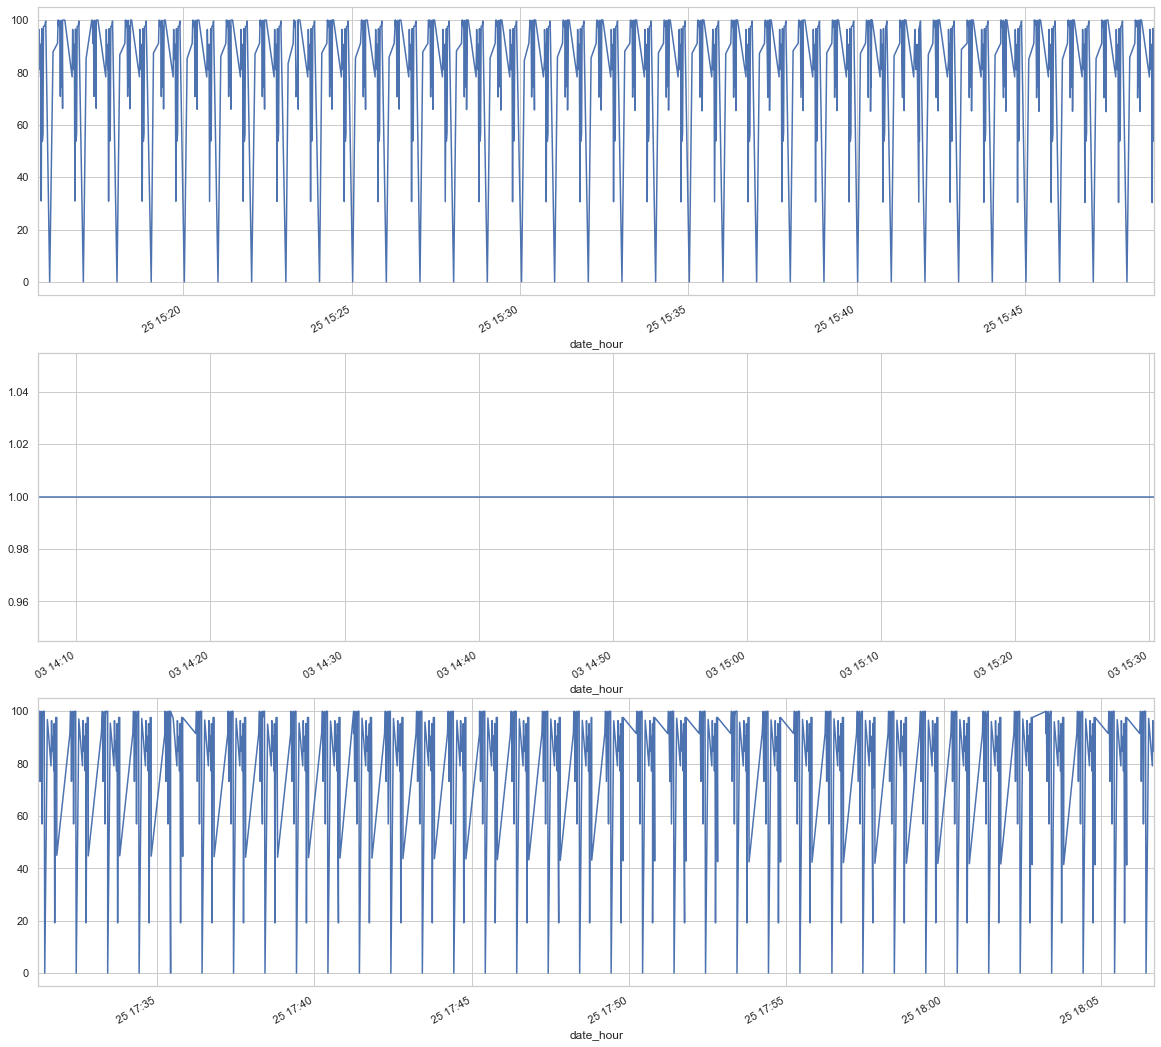

In [96]:
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(20, 20))
prd08mcs['value'].plot(ax=axes[0])
prd01mcs['value'].plot(ax=axes[1])
prd23crm['value'].plot(ax=axes[2])